Pictures were taken from here

https://github.com/Dyakonov/DL/blob/master/2022/DL_2CV_03archipart2_202204a.pdf

# LeNet-5

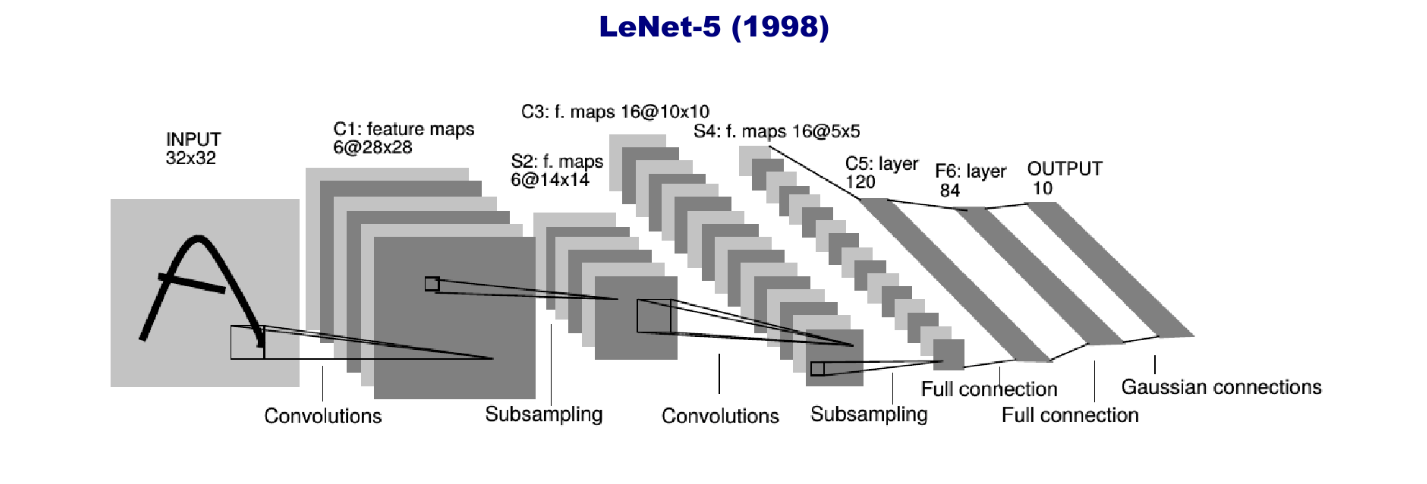

5 layers: 2 Conv (5x5) + 3 FC

Activation function: tanh

Pooling: AvgPool

# AlexNet

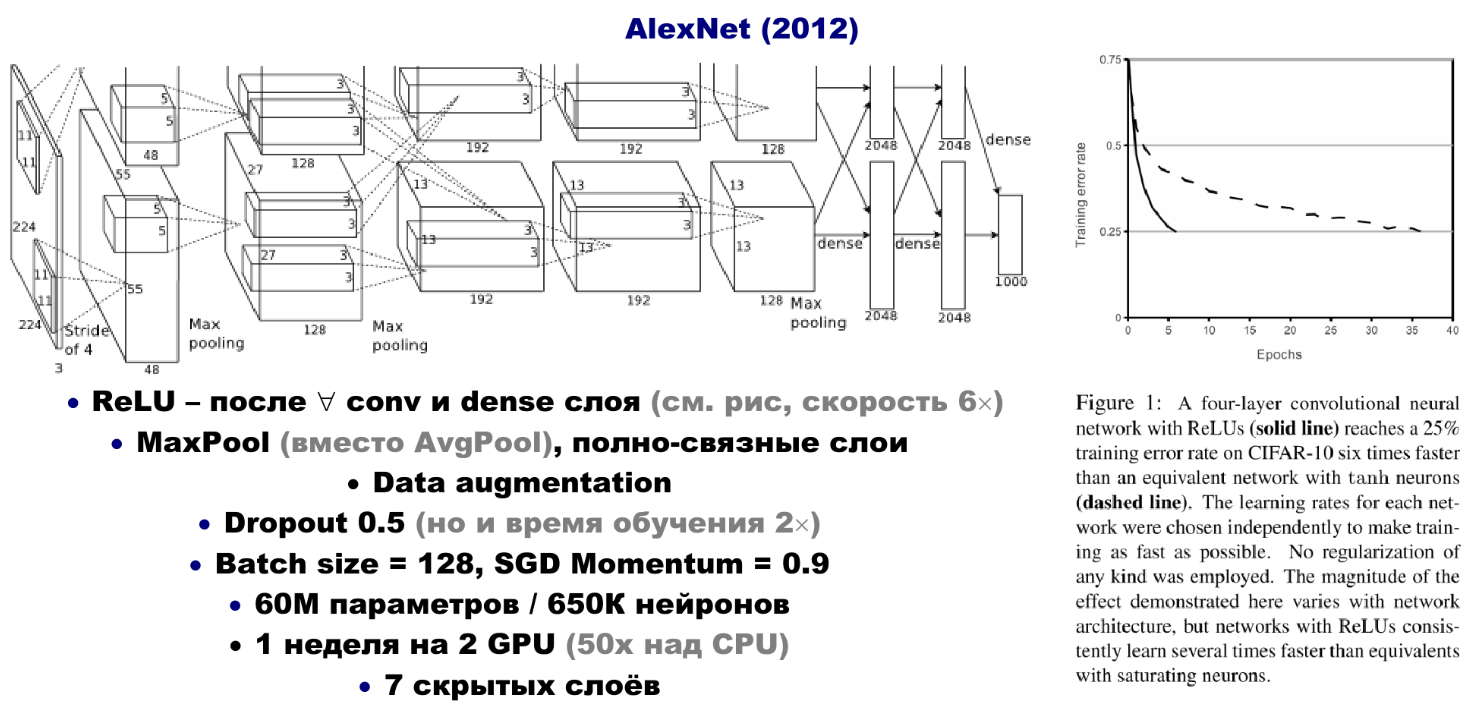

8 layers: 5 Conv (3x3, 5x5, 11x11) + 3 FC

Activation function: ReLU

Pooling: MaxPool

Dropout 0.5, SGD + Momentum=0.9, Batch size=128

# VGG

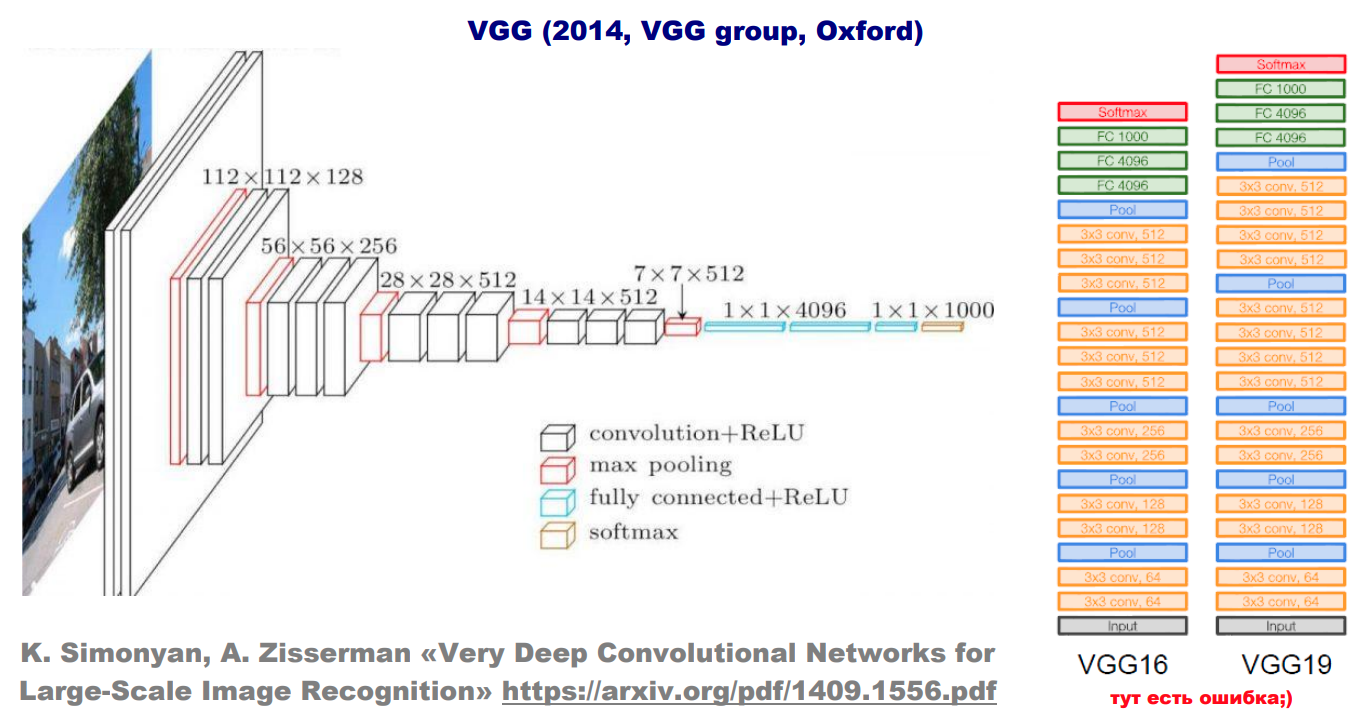

8 layers: 5 Conv (3x3) + 3 FC

Activation function: ReLU

Pooling: MaxPool

Dropout 0.5, SGD + Momentum=0.9, Batch size=256, LR=0.01, 3x3 Convolution Cascade (replace for 7x7 conv).

### Convolution Cascade

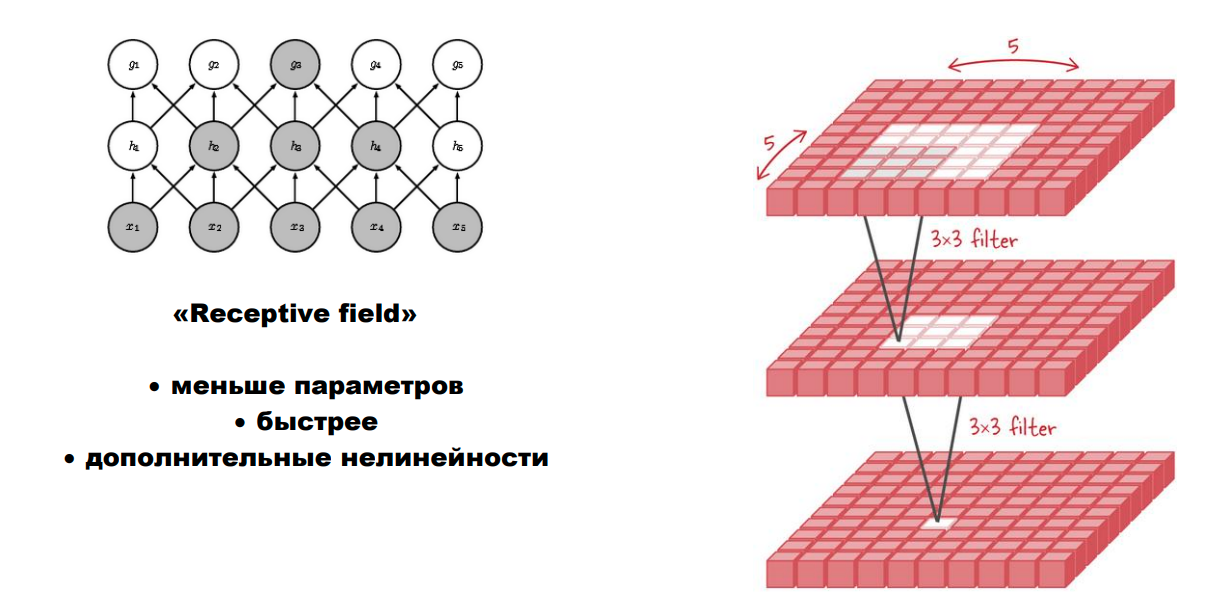

For example, two consecutive convolutions 3x3 can replace 5x5 convolution, but:
- less parameters (one 5x5 conv - 25 params, two 3x3 convs - 18 params)
- faster
- additional nonlinearities

# GoogLeNet / Inception

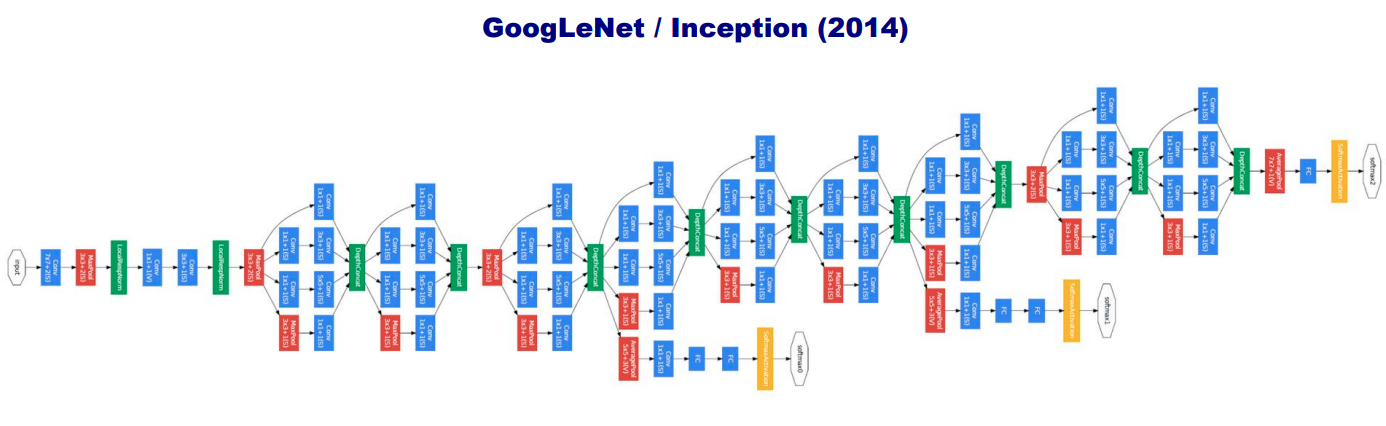

22 layers: All Conv (1x1, 3x3, 5x5), no FC

Activation function: ReLU

Pooling: MaxPool, Average Global Pooling (instead of FC)

Additional classifier outputs (weight 0.3 to total loss), Module architechture

### Inception modules

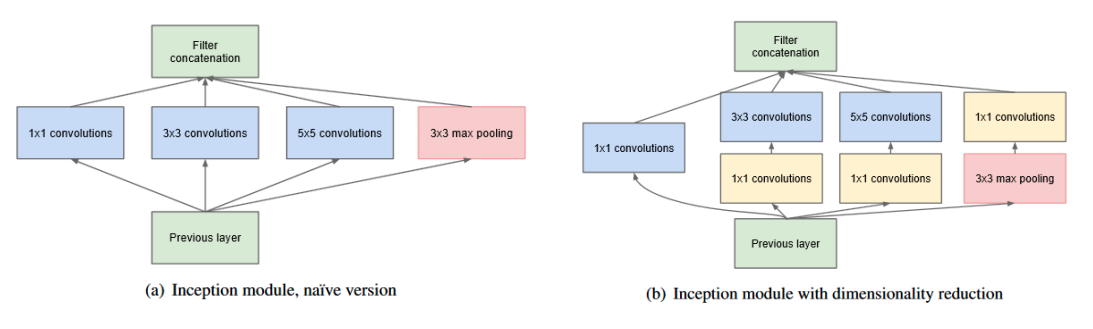

Main idea: different convs + pooling

### Inception v2 and v3 modules

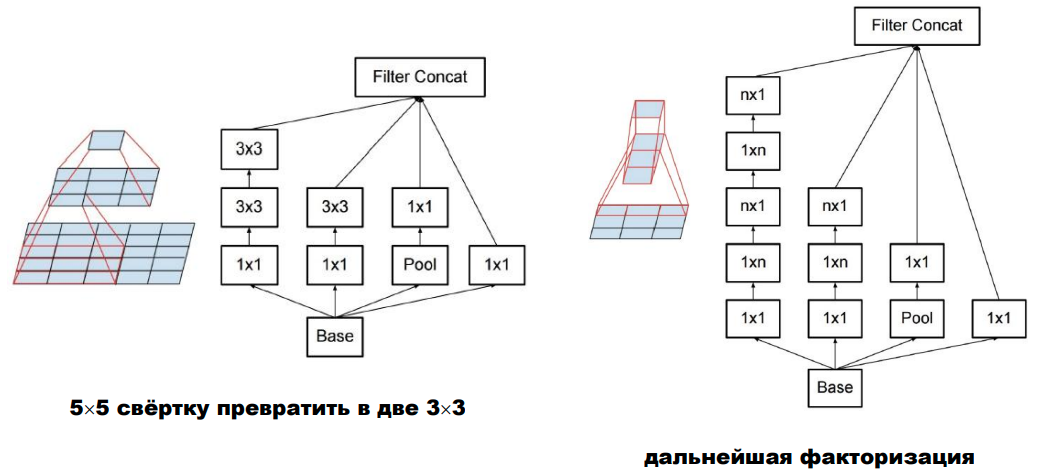

Add Batch Normalization

v2: 5x5 conv -> two consequtive 3x3 convs

v3: additional Convolution factorization

### Global Average Pooling idea

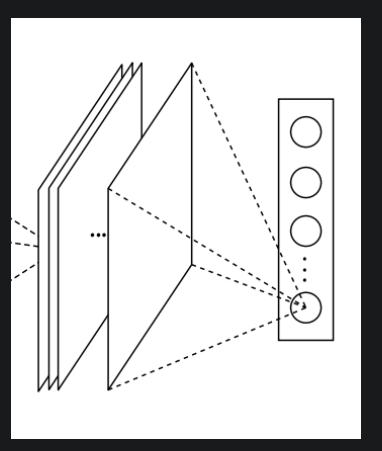

The idea is to generate one feature map for each corresponding category of the classification task in the last mlpconv layer. Instead of adding fully connected layers on top of the feature maps, we take the average of each feature map, and the resulting vector is fed directly into the softmax layer. 

### Convolution factorization/separation idea

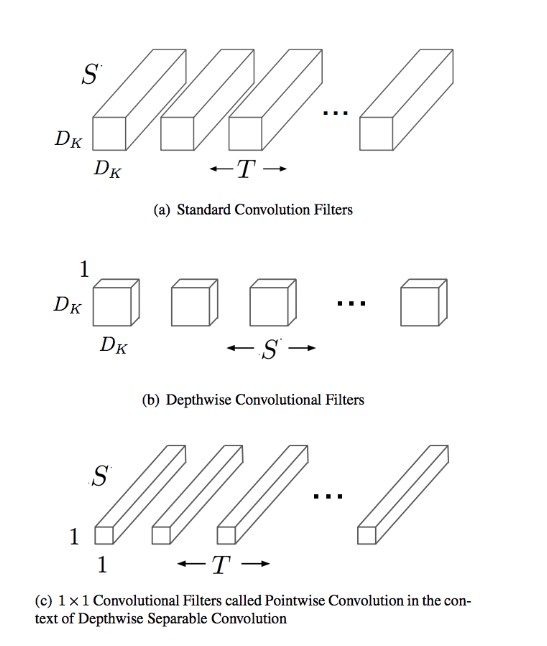

Factorized/separable convolution is a convolution, that can be factorized to product of simpler convolutions (like Depthwise + Pointwise convolution).

Read more here

http://stanford.edu/class/ee367/Winter2019/bergman_report.pdf

# ResNet

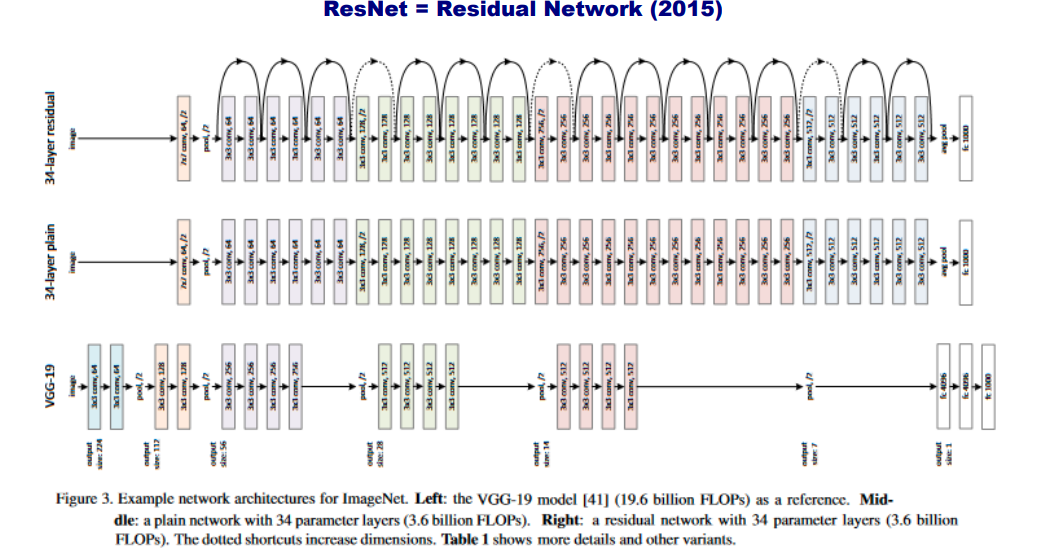

up to 152 layers: All Conv (1x1, 2x2, 3x3, 4x4, 5x5), except last FC

Activation function: ReLU

Pooling: MaxPool, Average Global Pooling (instead of FC)

No Dropout, Batch Norm (after Conv, before activation), Skip connections, SGD + Momentum=0.9, Batch size=256



### ResNet module

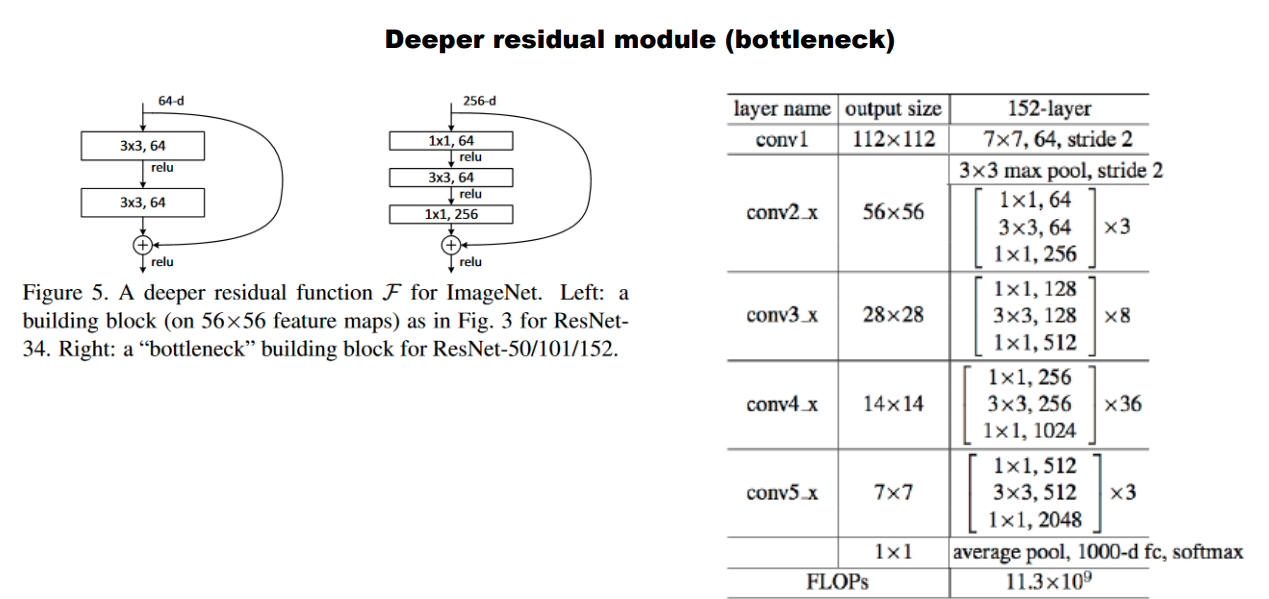

Skip connections make surface of loss function much smoother

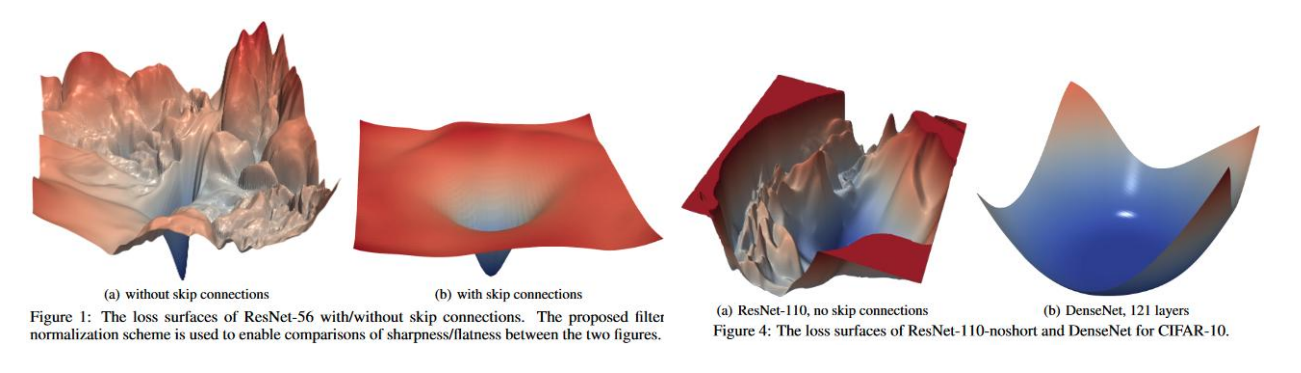

# Inception-V4

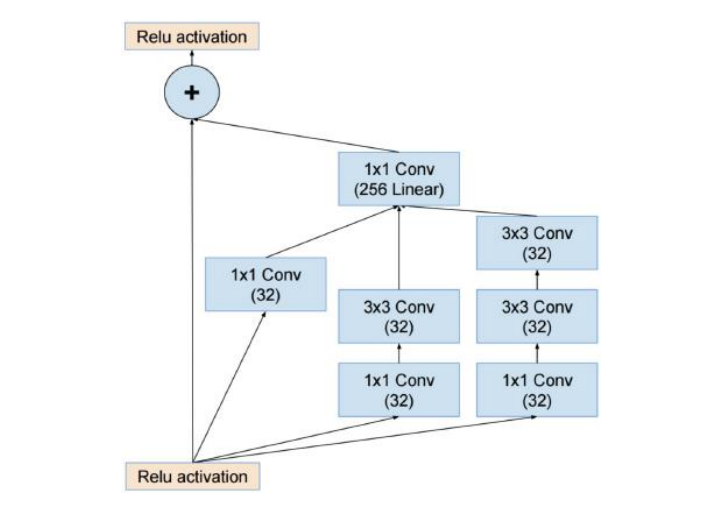

Inception-V3 + Resnet

# Xception

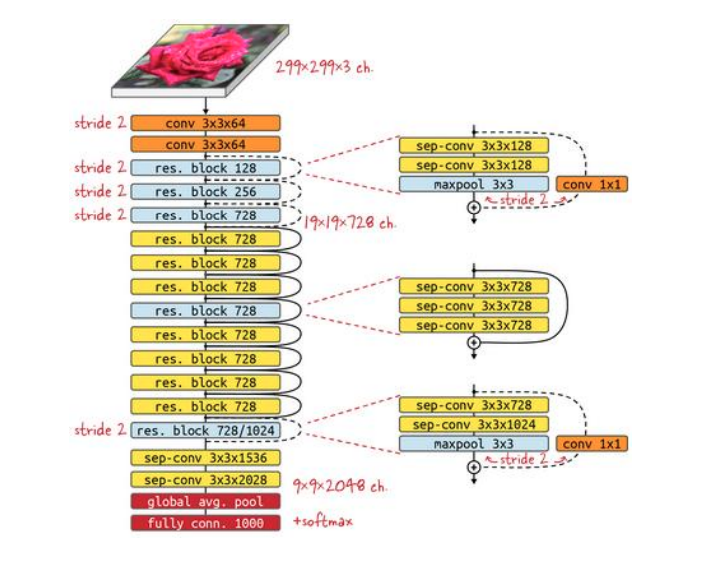

Resnet + Separable Convolutions

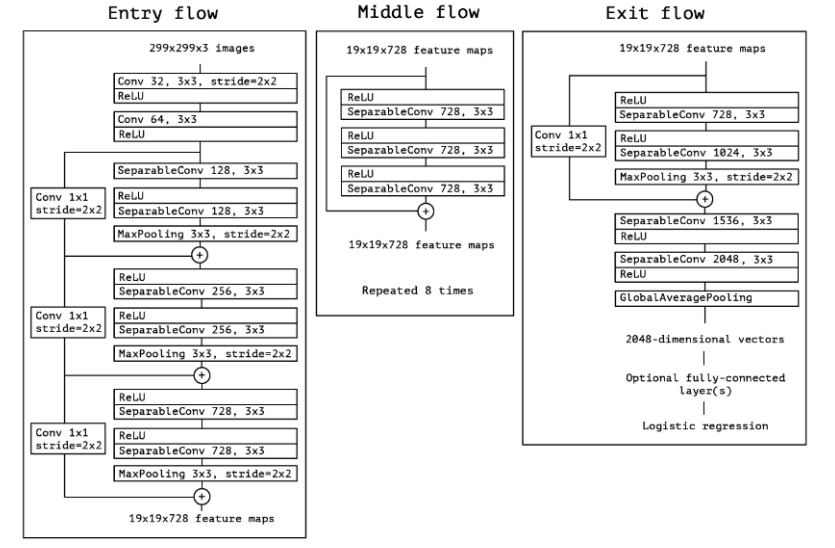

# SENet

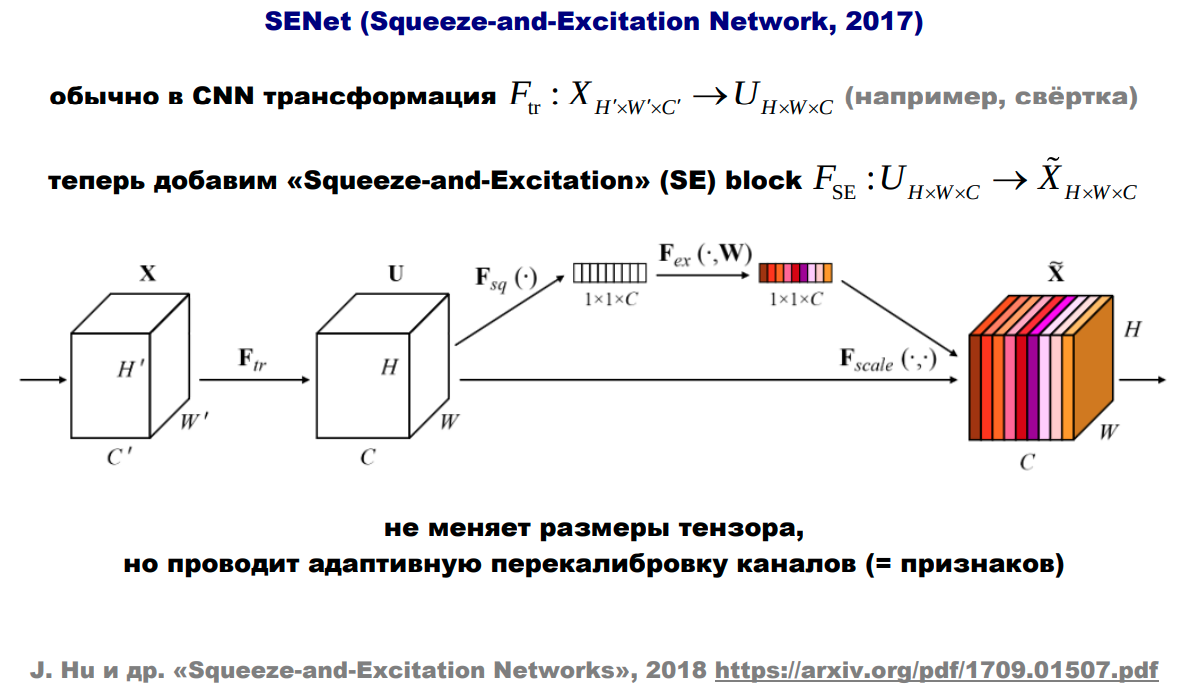

Add SE (Squeeze-and-Excitation) block. It doesn't change convolution layer size, but add adaptive channel rescale.

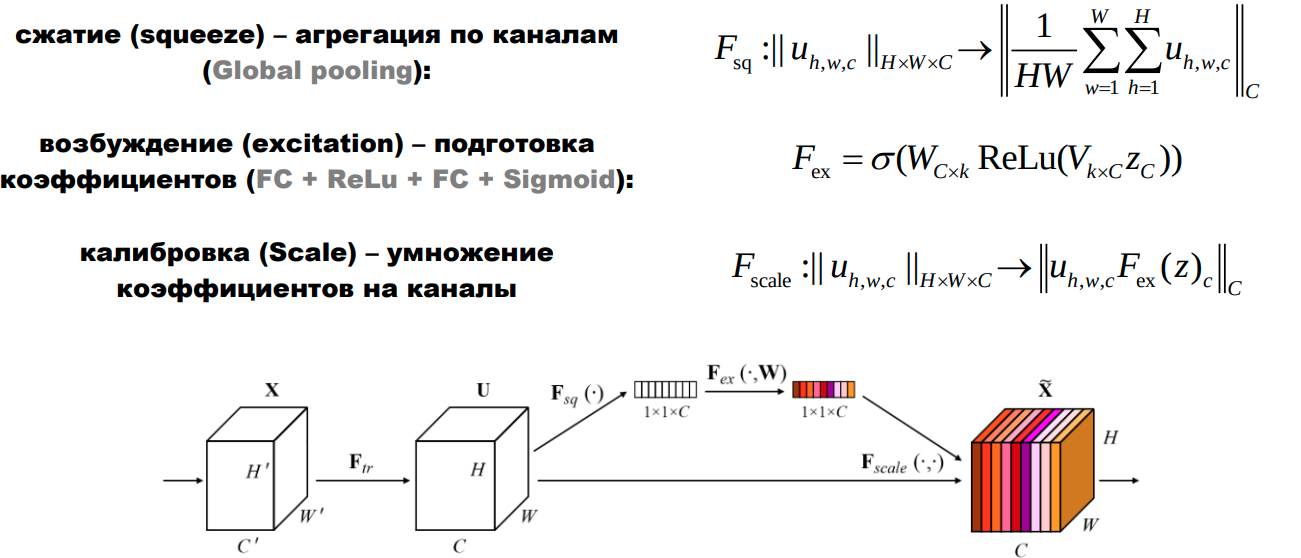

Squeeze - channel aggregation (Global Pooling)

Excitation - prepare channel coefficients (FC + ReLU + FC + Sigmoid)

Scale - every channel is multiplied by it's own coefficient

SE-block is an example of self-attention and bottleneck. It increases NN's representation power and lets interchannel dependencies using. Also it implements channel selection (like LASSO), increases important channel values and decreases unimportant.

### Network in Network

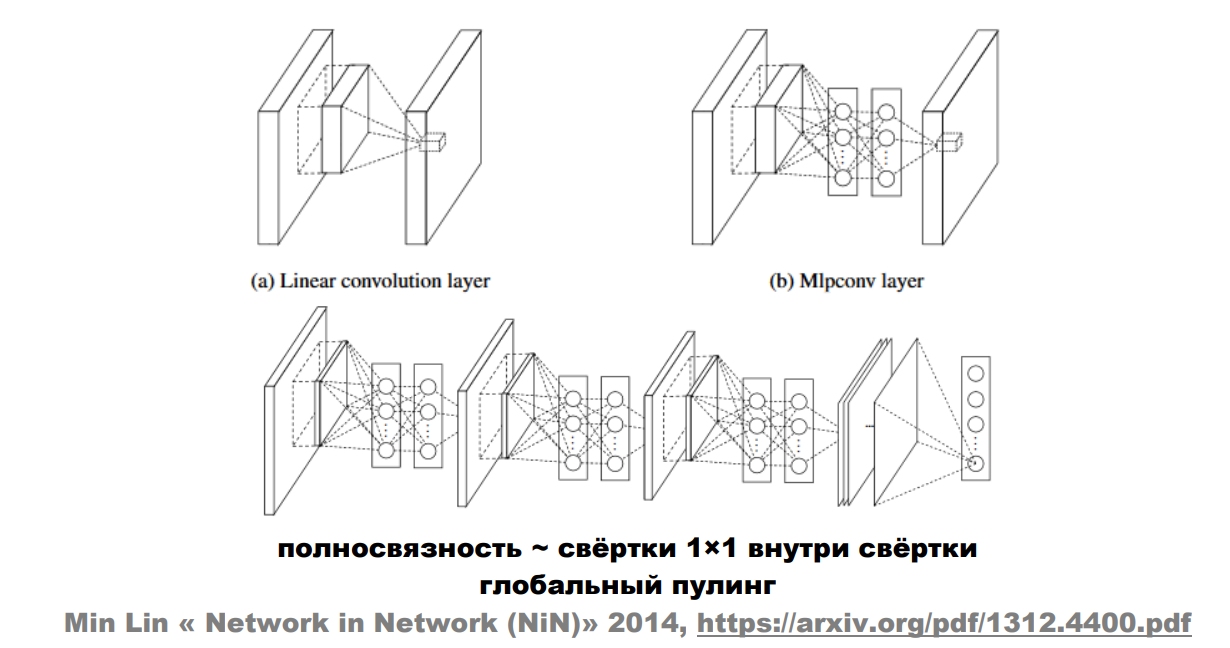

Convolution is replaced with MLP

### Stochastic Depth

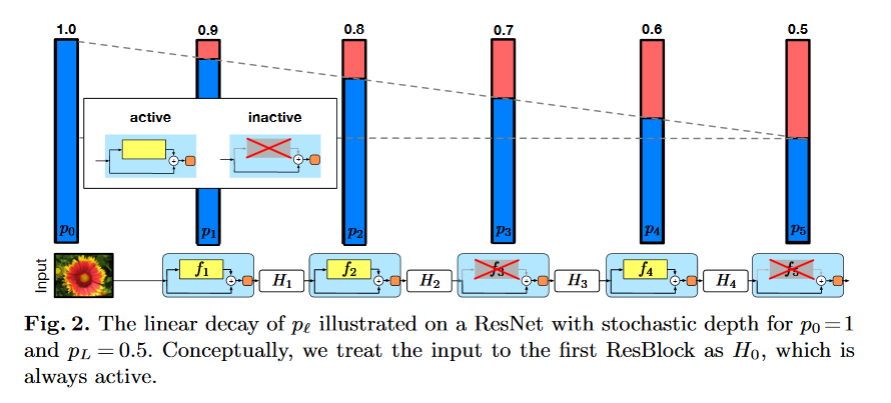

Randomly delete subset of layers and replace them with skip connections on each iteration of training process

# DenseNet.

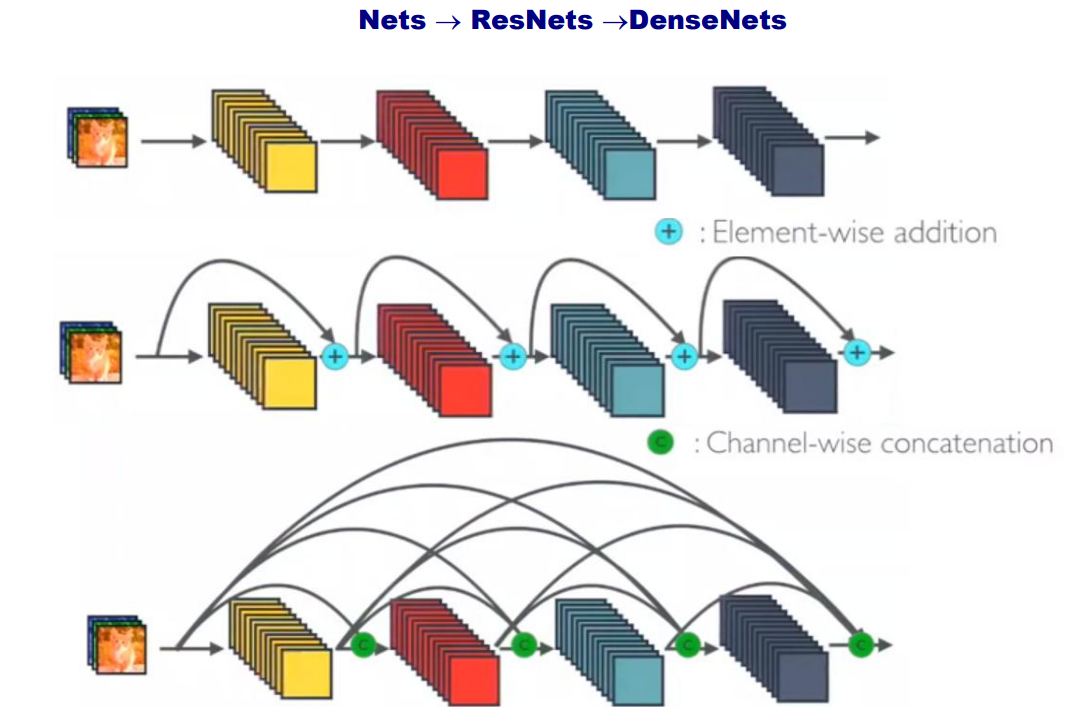

Simple NN: Z<sub>i</sub> = F<sub>i</sub>(Z<sub>i-1</sub>)

ResNet: Z<sub>i</sub> = F<sub>i</sub>(Z<sub>i-1</sub>) + Z<sub>i-1</sub>

DenseNet: Z<sub>i</sub> = F<sub>i</sub>(Z<sub>i-1</sub>, Z<sub>i-2</sub>, ..., Z<sub>0</sub>)

F = BN + ReLU + convolution + dropout

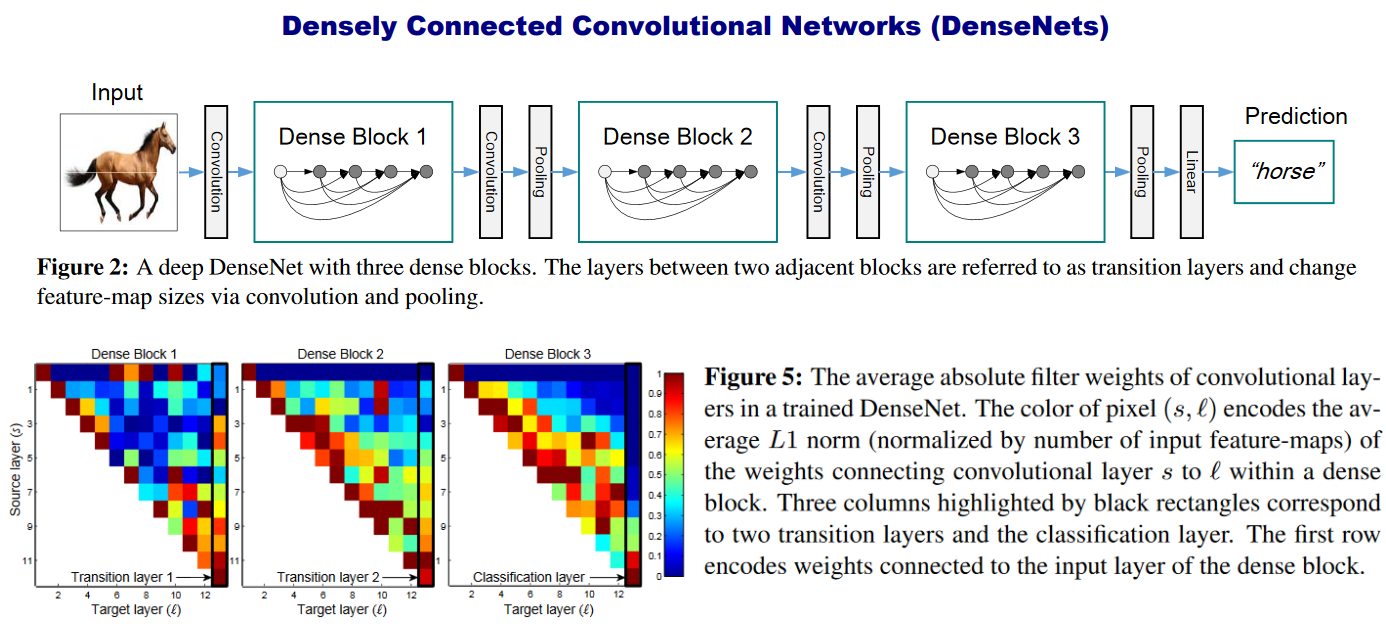

# ResNeXt

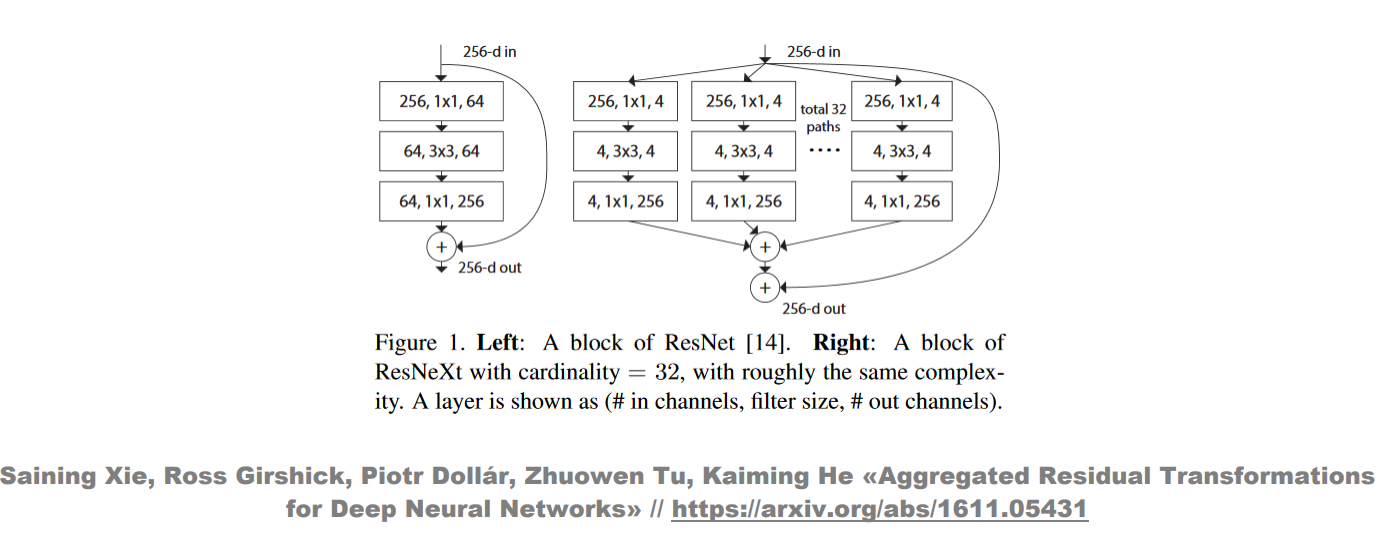

Same number of parameters as ResNet has, but one more parameter added - cardinality. Also bottleneck is used.

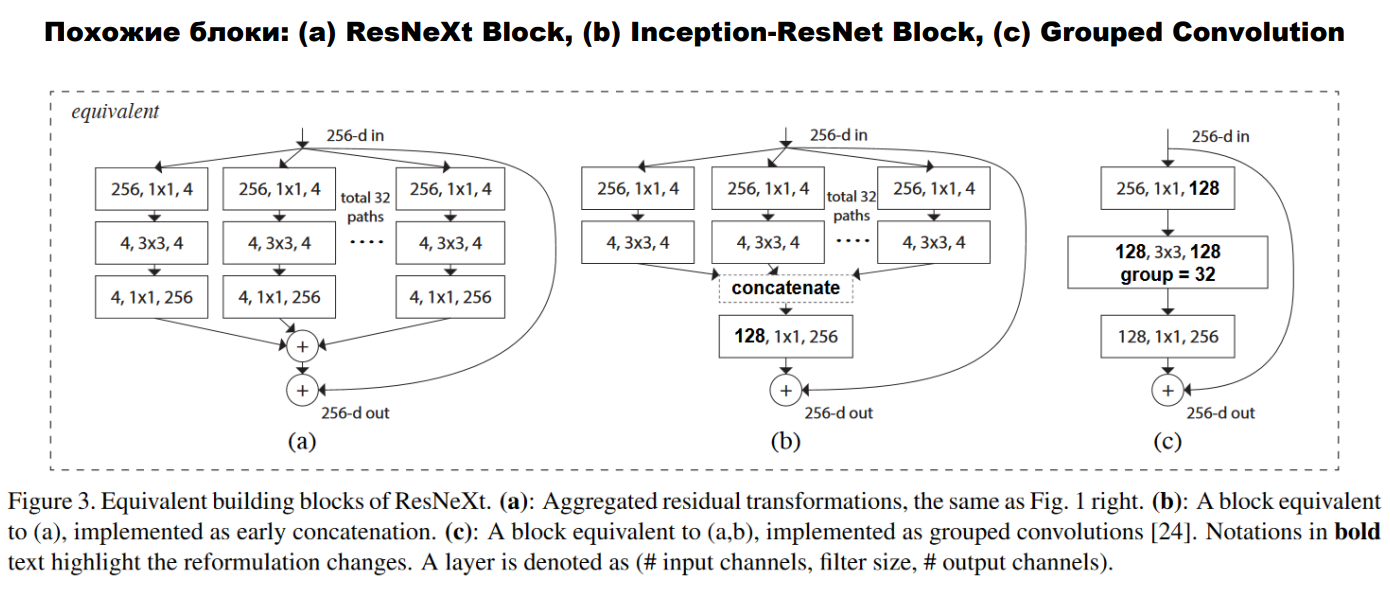

Similar blocks: ResNeXt Block (a), Inception-ResNet Block (b), Grouped Convolution (c)

Basically, ResNext block is a ResNet block with Group Convolution.

### Split-transform-aggregate strategy. 

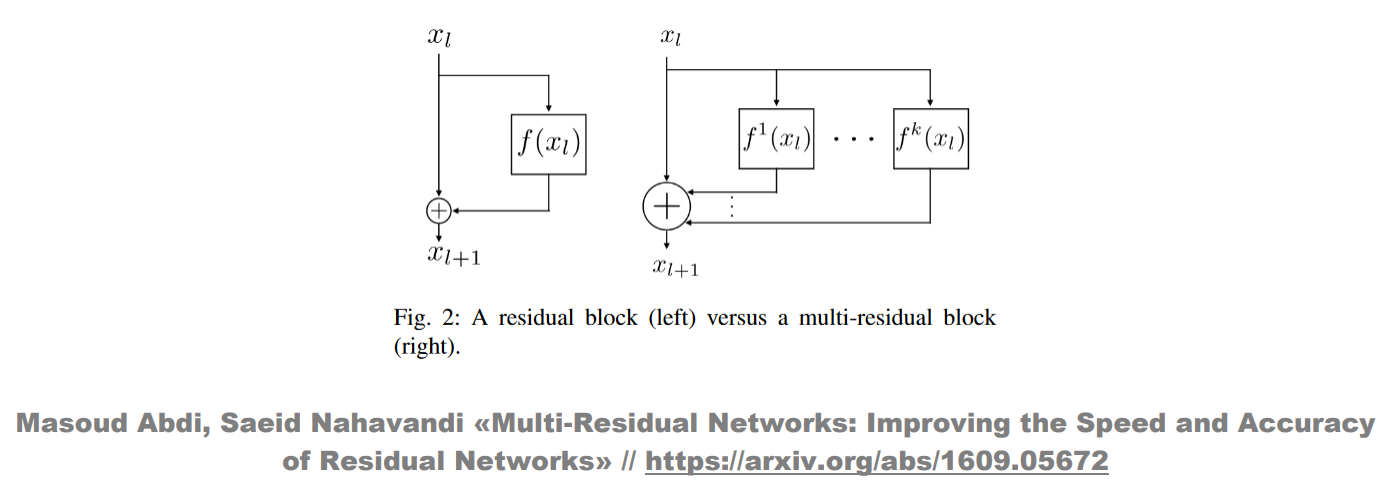

Is used in ResNext, MultiResNet, PolyNet

### Dynamic Convolution

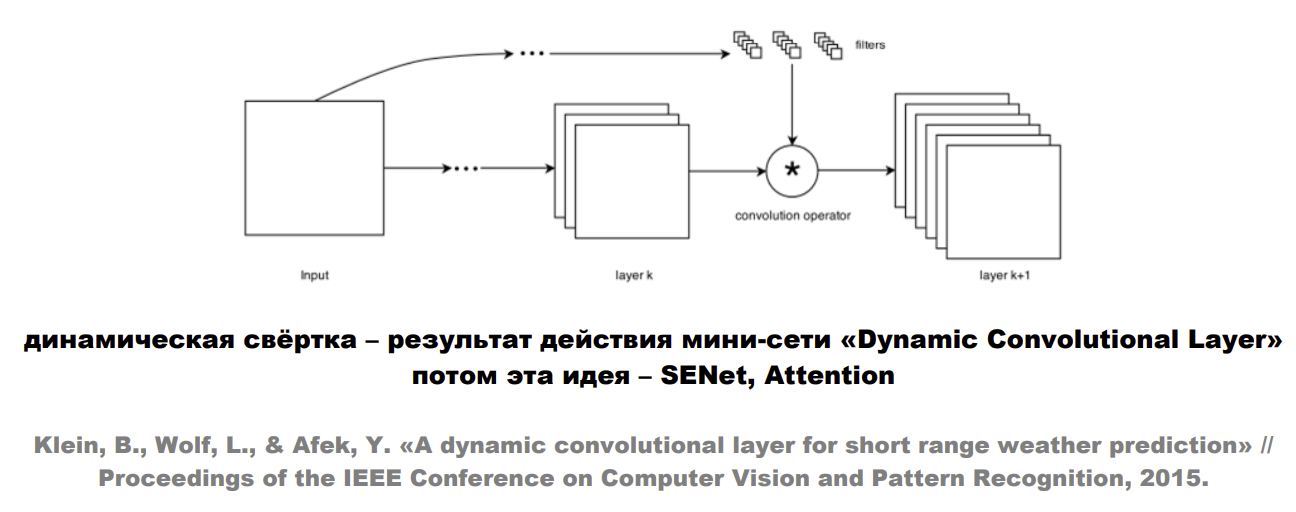

Idea: use special mini-NN "Dynamic Convolutional Layer" as convolutional layer. It can change conv filters according to the image part that it processes. Dynamic convolution improve main NN performance but it's heavier and slower that simple convolution

# Hyper Net

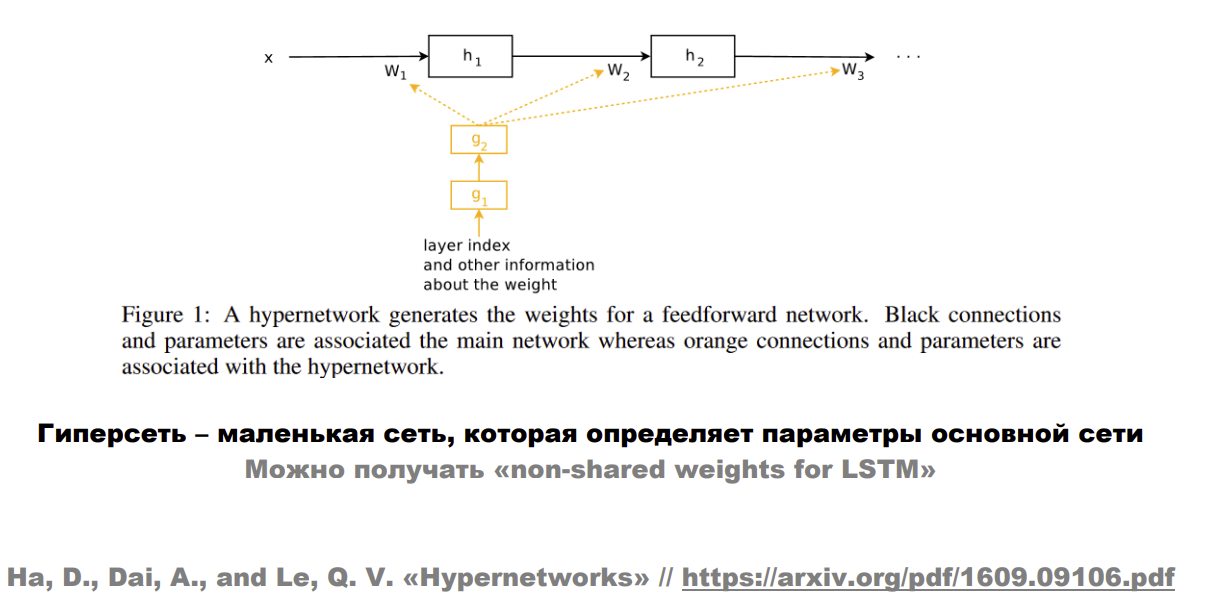

Hyper Net - is a small net (marked with orange color on the picture) that defines parameters of the main net.

# EfficientNet

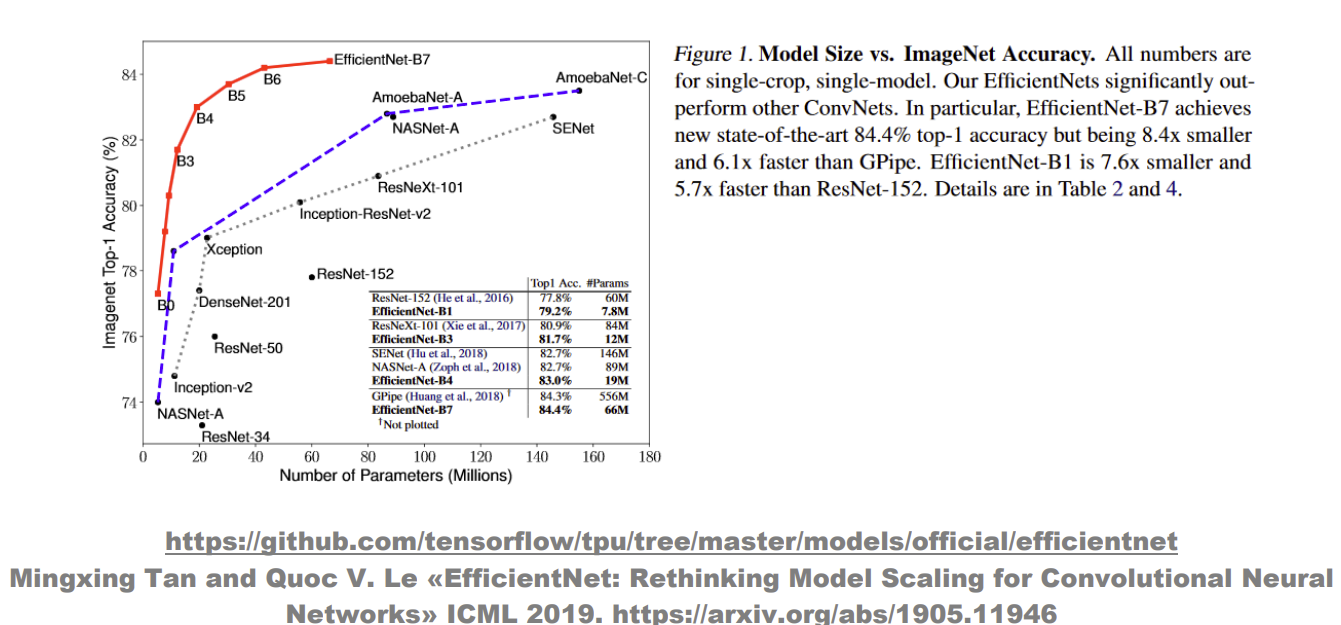

Main idea: effective scaling of the Conv NN

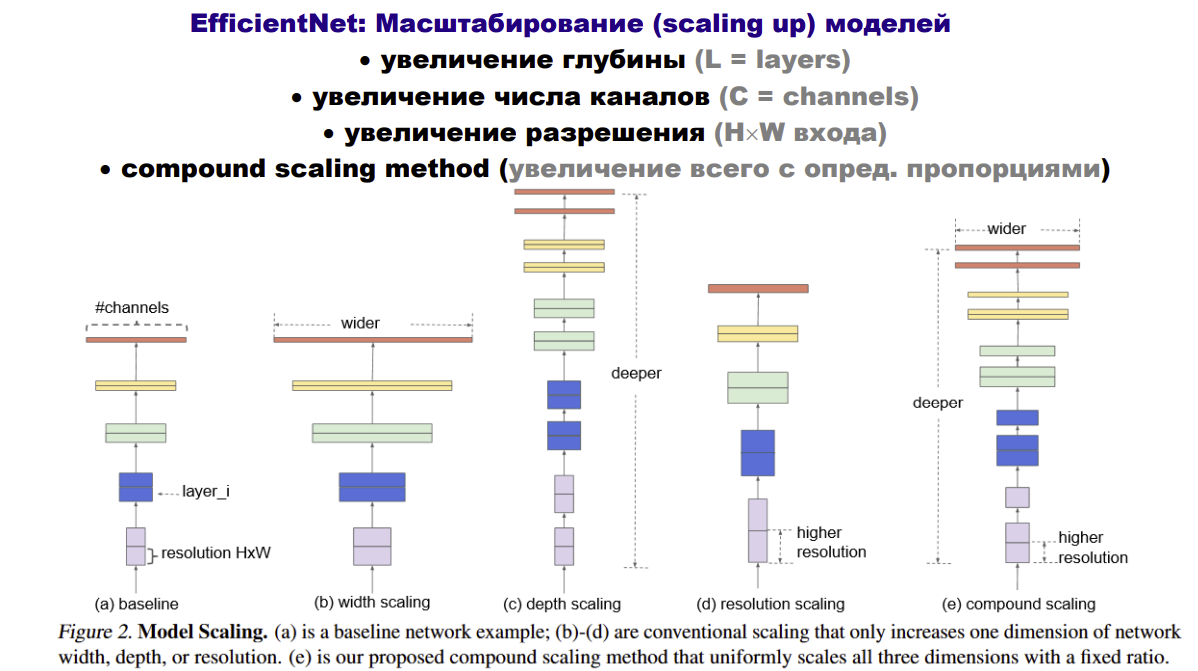

Finding the right proportion for the number of layers (L), channels (C) and resolution (r) significally increases NN performance.

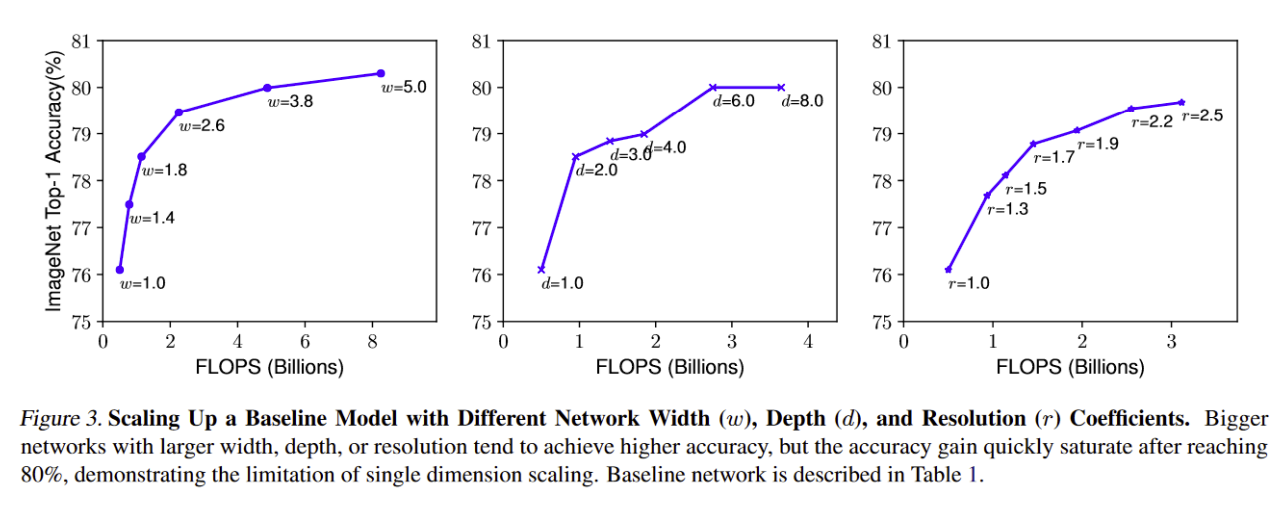

L, C and r are denoted as some numbers alpha, beta and gamma in power of another number phi. 

alpha * betta * gamma ~ 2

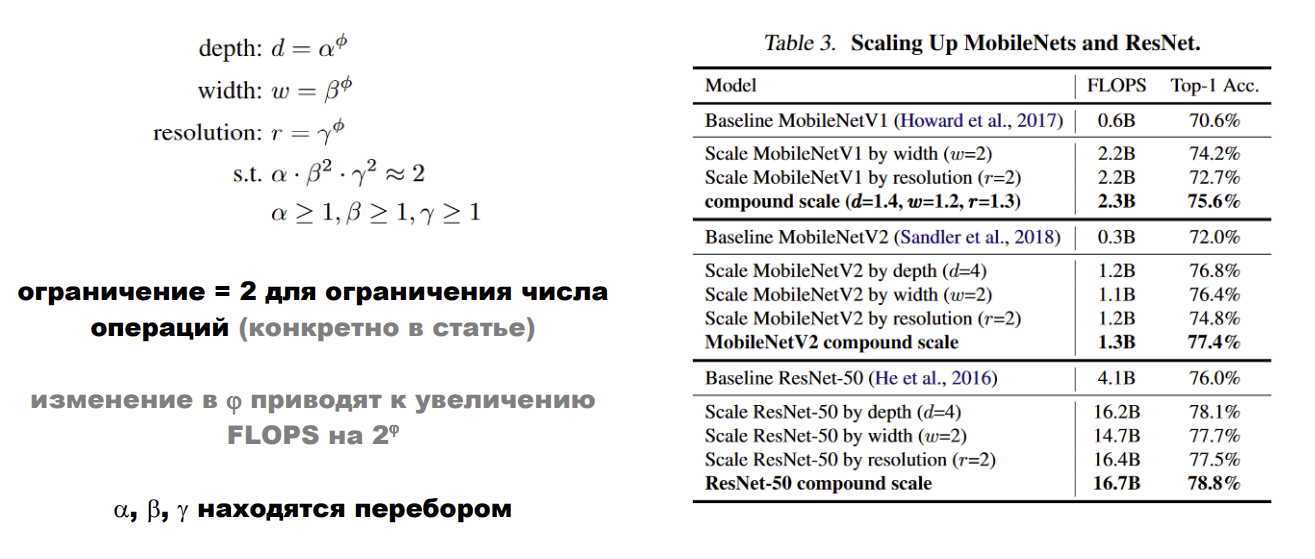

Increasing of phi leads to increasing of NN FLOPS on 2^phi

Alpha, betta and gamma are found through grid search.